## 준비

In [ ]:
# basic command
!pwd

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!ls ./gdrive/MyDrive/

In [ ]:
# 경로 이동
%cd /content/gdrive/MyDrive/BioSecurity

In [ ]:
# 필요한 라이브러리 설치
!pip install numpy opencv-python pandas

In [43]:
import numpy as np
import pandas as pd
import cv2

In [44]:
# 이미지 출력(시각화) 위한 라이브러리
import matplotlib.pyplot as plt

## 이미지 불러오기

In [45]:
# 파일 직접 업로드하는 방법 - 현재 경로에 업로드됨
from google.colab import files
uploaded = files.upload()

In [ ]:
# wget으로 실습 이미지 다운로드 받기 - 현재 경로에 다운로드됨
!wget -O porygon.jpg https://drive.usercontent.google.com/u/0/uc?id=1XYcmC5ODBJLue5yndR5kavNtSiSMZ16N&export=download

## 행렬 다루기

### 1차원

In [47]:
# python list
list_data=[1, 2, 3, 4, 255, 256, 257]

# numpy array(행렬)
np_data=np.array(list_data)

print(list_data, type(list_data))
print(np_data, type(np_data))

# 원소 타입 출력: dtype
print(np_data.dtype)

[1, 2, 3, 4, 255, 256, 257] <class 'list'>
[  1   2   3   4 255 256 257] <class 'numpy.ndarray'>
int64


In [48]:
# 원소 타입 변환: astype
# 이미지는 uint8 type
np_data=np_data.astype(np.uint8)

# 256부터는 overflow
# 256 -> 0
# 257 -> 1
print(np_data, type(np_data), np_data.dtype)

[  1   2   3   4 255   0   1] <class 'numpy.ndarray'> uint8


In [49]:
# numpy broadcasting
# 모든 원소에 *2
print(np_data*2)

[  2   4   6   8 254   0   2]


### 2차원

In [50]:
# 2차원 list
a = [[1,0], [0,1]] # I (Identity matrix)
b = [2,3]

# numpy array로 변환
np_a = np.array(a)
np_b = np.array(b)

print(np_a)
print(np_b)

[[1 0]
 [0 1]]
[2 3]


In [51]:
# numpy array shape 출력: shape
print(np_a.shape)  # (2, 2) -> 2d array
print(np_b.shape)  # (2,) -> 1d array (rank 1 array)

# rank 1 array는 쓰지 않는 것이 좋음
# np_b.reshape(2,1) or (1,2)로 벡터화하여 사용
np_b = np_b.reshape(2,1)
assert(np_b.shape == (2,1))  # shape이 맞지 않으면 AssertionError
print(np_b.shape)  # (2, 1) -> 2d array (vector)

# python list는 shape 확인 불가능 -> len(a) -> 첫 번째 차원(행 개수)만 알 수 있음
# -> matrix를 편하게 다루려면 numpy array를 사용

(2, 2)
(2,)
(2, 1)


In [52]:
print(np_b)

[[2]
 [3]]


### 곱 연산

In [53]:
# 원소끼리의 곱 (elementwise product)
# broadcasting
print(np_a * np_b)

# 행렬 곱
# 방법 1.
print(np_a @ np_b)
# 방법 2.
print(np.dot(np_a, np_b))

[[2 0]
 [0 3]]
[[2]
 [3]]
[[2]
 [3]]


### 역행렬

In [54]:
# 역행렬 구하는 함수: numpy.linalg.inv()
print(np.linalg.inv(np_a)) # identity matrix의 역행렬은 자기자신
print(np.linalg.inv(np.array([[2,3], [4,5]])))

[[1. 0.]
 [0. 1.]]
[[-2.5  1.5]
 [ 2.  -1. ]]


## Image Processing

In [55]:
# 출력되는 이미지의 크기 지정 (너비, 높이)
plt.rcParams['figure.figsize']=(4,4)

In [56]:
# 이미지를 bgr로 읽기: imread()
bgr_img = cv2.imread('./porygon.jpg')

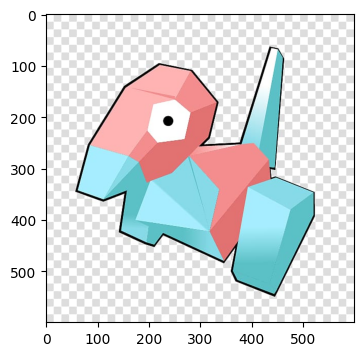

In [57]:
# bgr 이미지 -> rgb 이미지: cvtColor()
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

# 이미지 출력: imshow()
plt.imshow(rgb_img)

In [58]:
# 이미지는 numpy array 형식
print(type(bgr_img))  # ndarray

print(bgr_img.shape, bgr_img.dtype)
# (600, 600, 3), type: np.uint8
# (row(y), col(x), channel(color=3))

<class 'numpy.ndarray'>
(600, 600, 3) uint8


### 이미지 샘플링

In [59]:
# [y, x]
print(bgr_img[200, 150])  # 3 채널 픽셀값 출력
print(bgr_img[300, 100])

# 이미지의 해당 좌표 색상과 색상 채널 값 비교 가능
# r: 255이면 빨간색, b: 255이면 파란색에 가깝게 보임

[179 179 255]
[255 237 166]


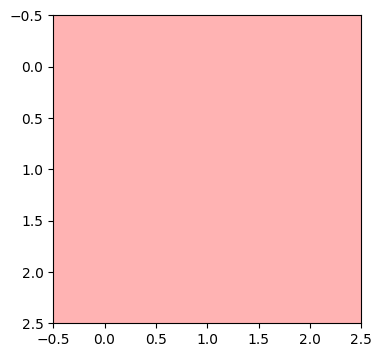

In [60]:
# array를 슬라이싱해서 이미지 일부 영역만 샘플링 (crop)
plt.imshow(rgb_img[199:202, 149:152])

In [61]:
# 이미지 크기 줄이기 (resize) -> 300x300
# 한 픽셀씩 건너뛰어 새로운 이미지 생성
half_img = rgb_img[::2, ::2]  # 처음부터 끝까지 step을 2로
print(half_img.shape)  # (300, 300, 3)

(300, 300, 3)


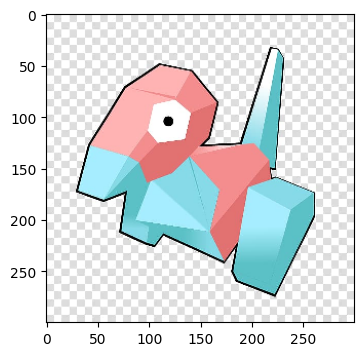

In [62]:
# 이미지 출력
plt.imshow(half_img)

# 해상도가 낮아져서 깨지면서 출력됨

### gray scale image

(600, 600)


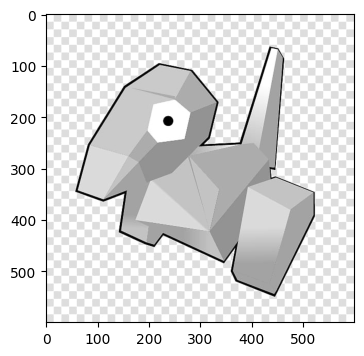

In [63]:
# color -> gray scale: 마찬가지로 cvtColor()
# 제공되는 함수를 사용해 쉽게 변환 가능
img_gray = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)  # (600, 600) -> 채널이 1개로 줄어듦

# gray scale 이미지 출력할 때는 cmap='gray'
plt.imshow(img_gray, cmap='gray')

(600, 600)
uint8


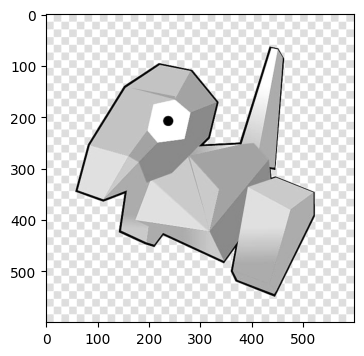

In [64]:
# color -> gray 직접 변환
# 흑백 이미지 변환 수식 사용
# 0.2126 * R + 0.7152 * G + 0.0722 * B
img_gray = 0.2126 * bgr_img[:,:,2] + 0.7152 * bgr_img[:,:,1] + 0.0722 * bgr_img[:,:,0]  # broadcasting

# 주의할 점: 실수를 곱해서 type이 float64로 바뀜 -> astype(np.uint8)으로 다시 변환
img_gray = img_gray.astype(np.uint8)
print(img_gray.shape)
print(img_gray.dtype)

plt.imshow(img_gray, cmap='gray')

### binary image

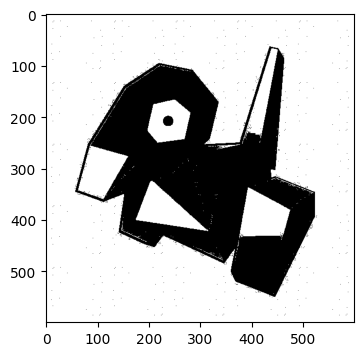

In [65]:
# 이미지 이진화 (gray -> binary)

# 모두 0인 이미지 생성
img_zero = np.zeros((600, 600), dtype=np.uint8)

# threshold 210을 기준으로 더 어두운 부분은 0(검정색)으로 유지, 밝은 부분은 255(흰색)으로 -> 0==false, 255==true

# gray image에서 픽셀값이 210 초과인(밝은) 좌표만 img_zero에서 255 값을 저장
img_zero[img_gray > 210] = 255

plt.imshow(img_zero, cmap='gray')

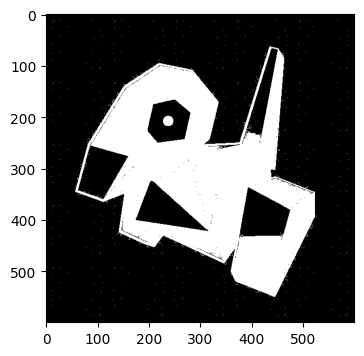

In [66]:
# 배경은 어둡게, 관심 영역을 밝게 -> 반전시키기
img_zero = 255 - img_zero

plt.imshow(img_zero, cmap='gray')

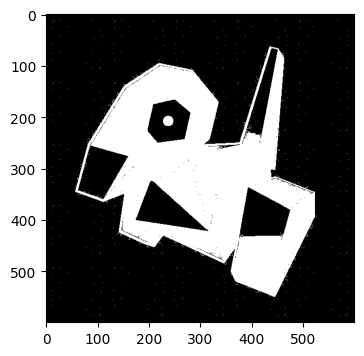

In [37]:
# 위의 두 셀을 합쳐 다른 방식으로 표현한 코드

# 모두 255인 이미지 생성
img_white = np.full((600, 600), 255, dtype=np.uint8)

# threshold 210을 기준으로 더 밝은 부분은 0(검정색)으로, 어두운 부분은 255로 유지

# gray image에서 픽셀값이 210 초과인(밝은) 좌표만 img_zero에서 0 값을 저장
img_white[img_gray > 210] = 0

plt.imshow(img_white, cmap='gray')

### masking

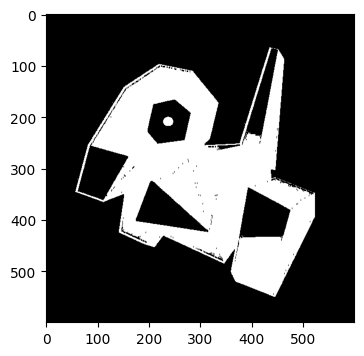

In [67]:
img_src = img_zero.copy()
# 배경의 노이즈(하얀색 점) 없애기: erode()
# 2번 반복
img_erode = cv2.erode(img_src, (10, 10))
img_erode = cv2.erode(img_erode, (10, 10))

plt.imshow(img_erode, cmap='gray')

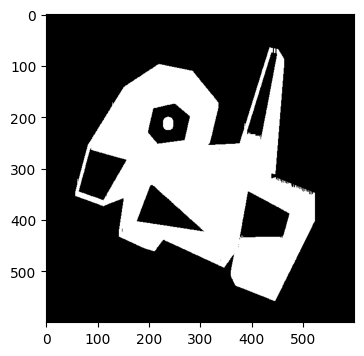

In [68]:
# 관심 영역 채우기: dilate()
# 8번 반복
img_dil = cv2.dilate(img_erode, (10, 10), iterations=8)
plt.imshow(img_dil, cmap='gray')

In [69]:
# 직접 구현하는 방식

# 커널을 미리 정의하여 이미지에 적용(필터링)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))  # 3x3 size kernel
print(kernel)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


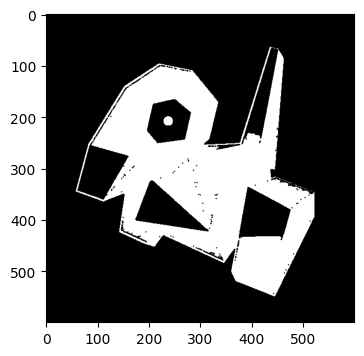

In [70]:
# 정의한 커널 사용하여 erode
img_morph = cv2.morphologyEx(img_src, cv2.MORPH_ERODE, kernel, iterations=1)
plt.imshow(img_morph, cmap='gray')

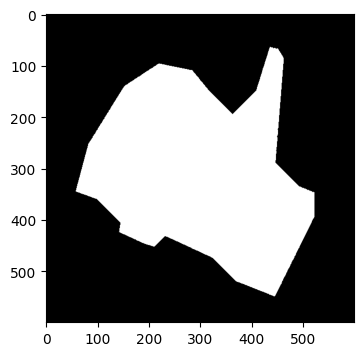

In [71]:
# close: dilate -> erode
# iterations의 적당한 수준을 찾아내는 것이 중요한 과제
img_morph = cv2.morphologyEx(img_morph, cv2.MORPH_CLOSE, kernel, iterations=45)
plt.imshow(img_morph, cmap='gray')

# mask 얻음

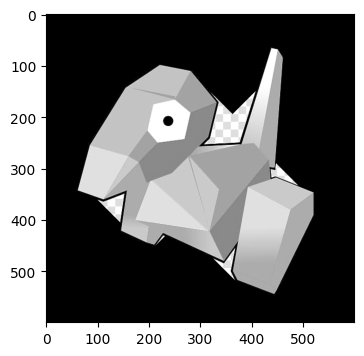

In [72]:
# 얻은 mask를 원본 이미지에 적용

# mask 이미지에서 값이 255인 좌표(관심 영역)만 img_gray에서 값을 유지하고 나머지는 0
img_threshold = np.where(img_morph == 255, img_gray, 0)

# 배경을 제외한 관심 객체만 masking된 결과 출력
plt.imshow(img_threshold, cmap='gray')

# 출력된 불필요한 부분들(에러)를 최대한 제거하는 것이 목표 = 전처리